In [288]:
#Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #imported Seaborn with the alias sns
import plotly.express as px # library to create a pie chart in Python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn import svm,datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold,LeaveOneOut,ShuffleSplit
from sklearn import datasets

In [149]:
df=pd.read_csv(r"C:\Users\Shannu\Downloads\cardio_train.csv")
df

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
...,...
69995,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69996,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69997,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69998,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


In [151]:
#CheckNull
df.isnull().sum()

id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio    0
dtype: int64

In [153]:
df = pd.read_csv(r"C:\Users\Shannu\Downloads\cardio_train.csv", delimiter=';')
#'delimiter' parameter is set to ';' indicating that the values in the CSV file are separated by semicolons.
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [155]:
#drop method is used to remove specified labels from rows or columns in the DataFrame
#axis=1 operation should be performed along columns 
df = df.drop("id",axis = 1)

In [157]:
#The statistics include count, mean, std, min, 25%, 50% , 75%, and max.
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
# is useful for understanding the size of your dataset, checking for missing values,
# an overview of the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [161]:
#This will print the first few rows of the DataFrame,
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [163]:
# Split the data into features and target variable
x = df.drop('cardio',axis = 1)#the features
y = df['cardio']#the target

In [165]:
#No of Row and Features
x.shape,y.shape

((70000, 11), (70000,))

In [167]:
# Assuming 'x' is your feature matrix
scaler = StandardScaler()
#x-mean/std betweeen -1 to 1

# Fit the scaler to your data and transform it
x = scaler.fit_transform(x)#calculate mean and apply for all columns
x

array([[-0.43606151,  1.36405487,  0.44345206, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [ 0.30768633, -0.73310834, -1.01816804, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [-0.24799666, -0.73310834,  0.07804703, ..., -0.31087913,
        -0.23838436, -2.02360695],
       ...,
       [-0.16328642,  1.36405487,  2.27047718, ..., -0.31087913,
         4.19490608, -2.02360695],
       [ 1.20058905, -0.73310834, -0.16555632, ..., -0.31087913,
        -0.23838436, -2.02360695],
       [ 0.43414373, -0.73310834,  0.68705541, ..., -0.31087913,
        -0.23838436,  0.49416711]])

In [169]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

<Axes: xlabel='cardio', ylabel='count'>

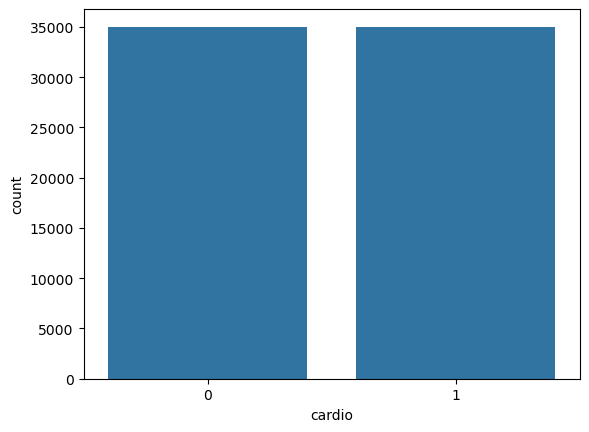

In [171]:
#To check how many have cardio and how many do not
sns.countplot(x="cardio",data=df)

In [173]:
#value_counts(): This method counts the of each unique value in the selected column
#And returns a Series with the counts
df["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

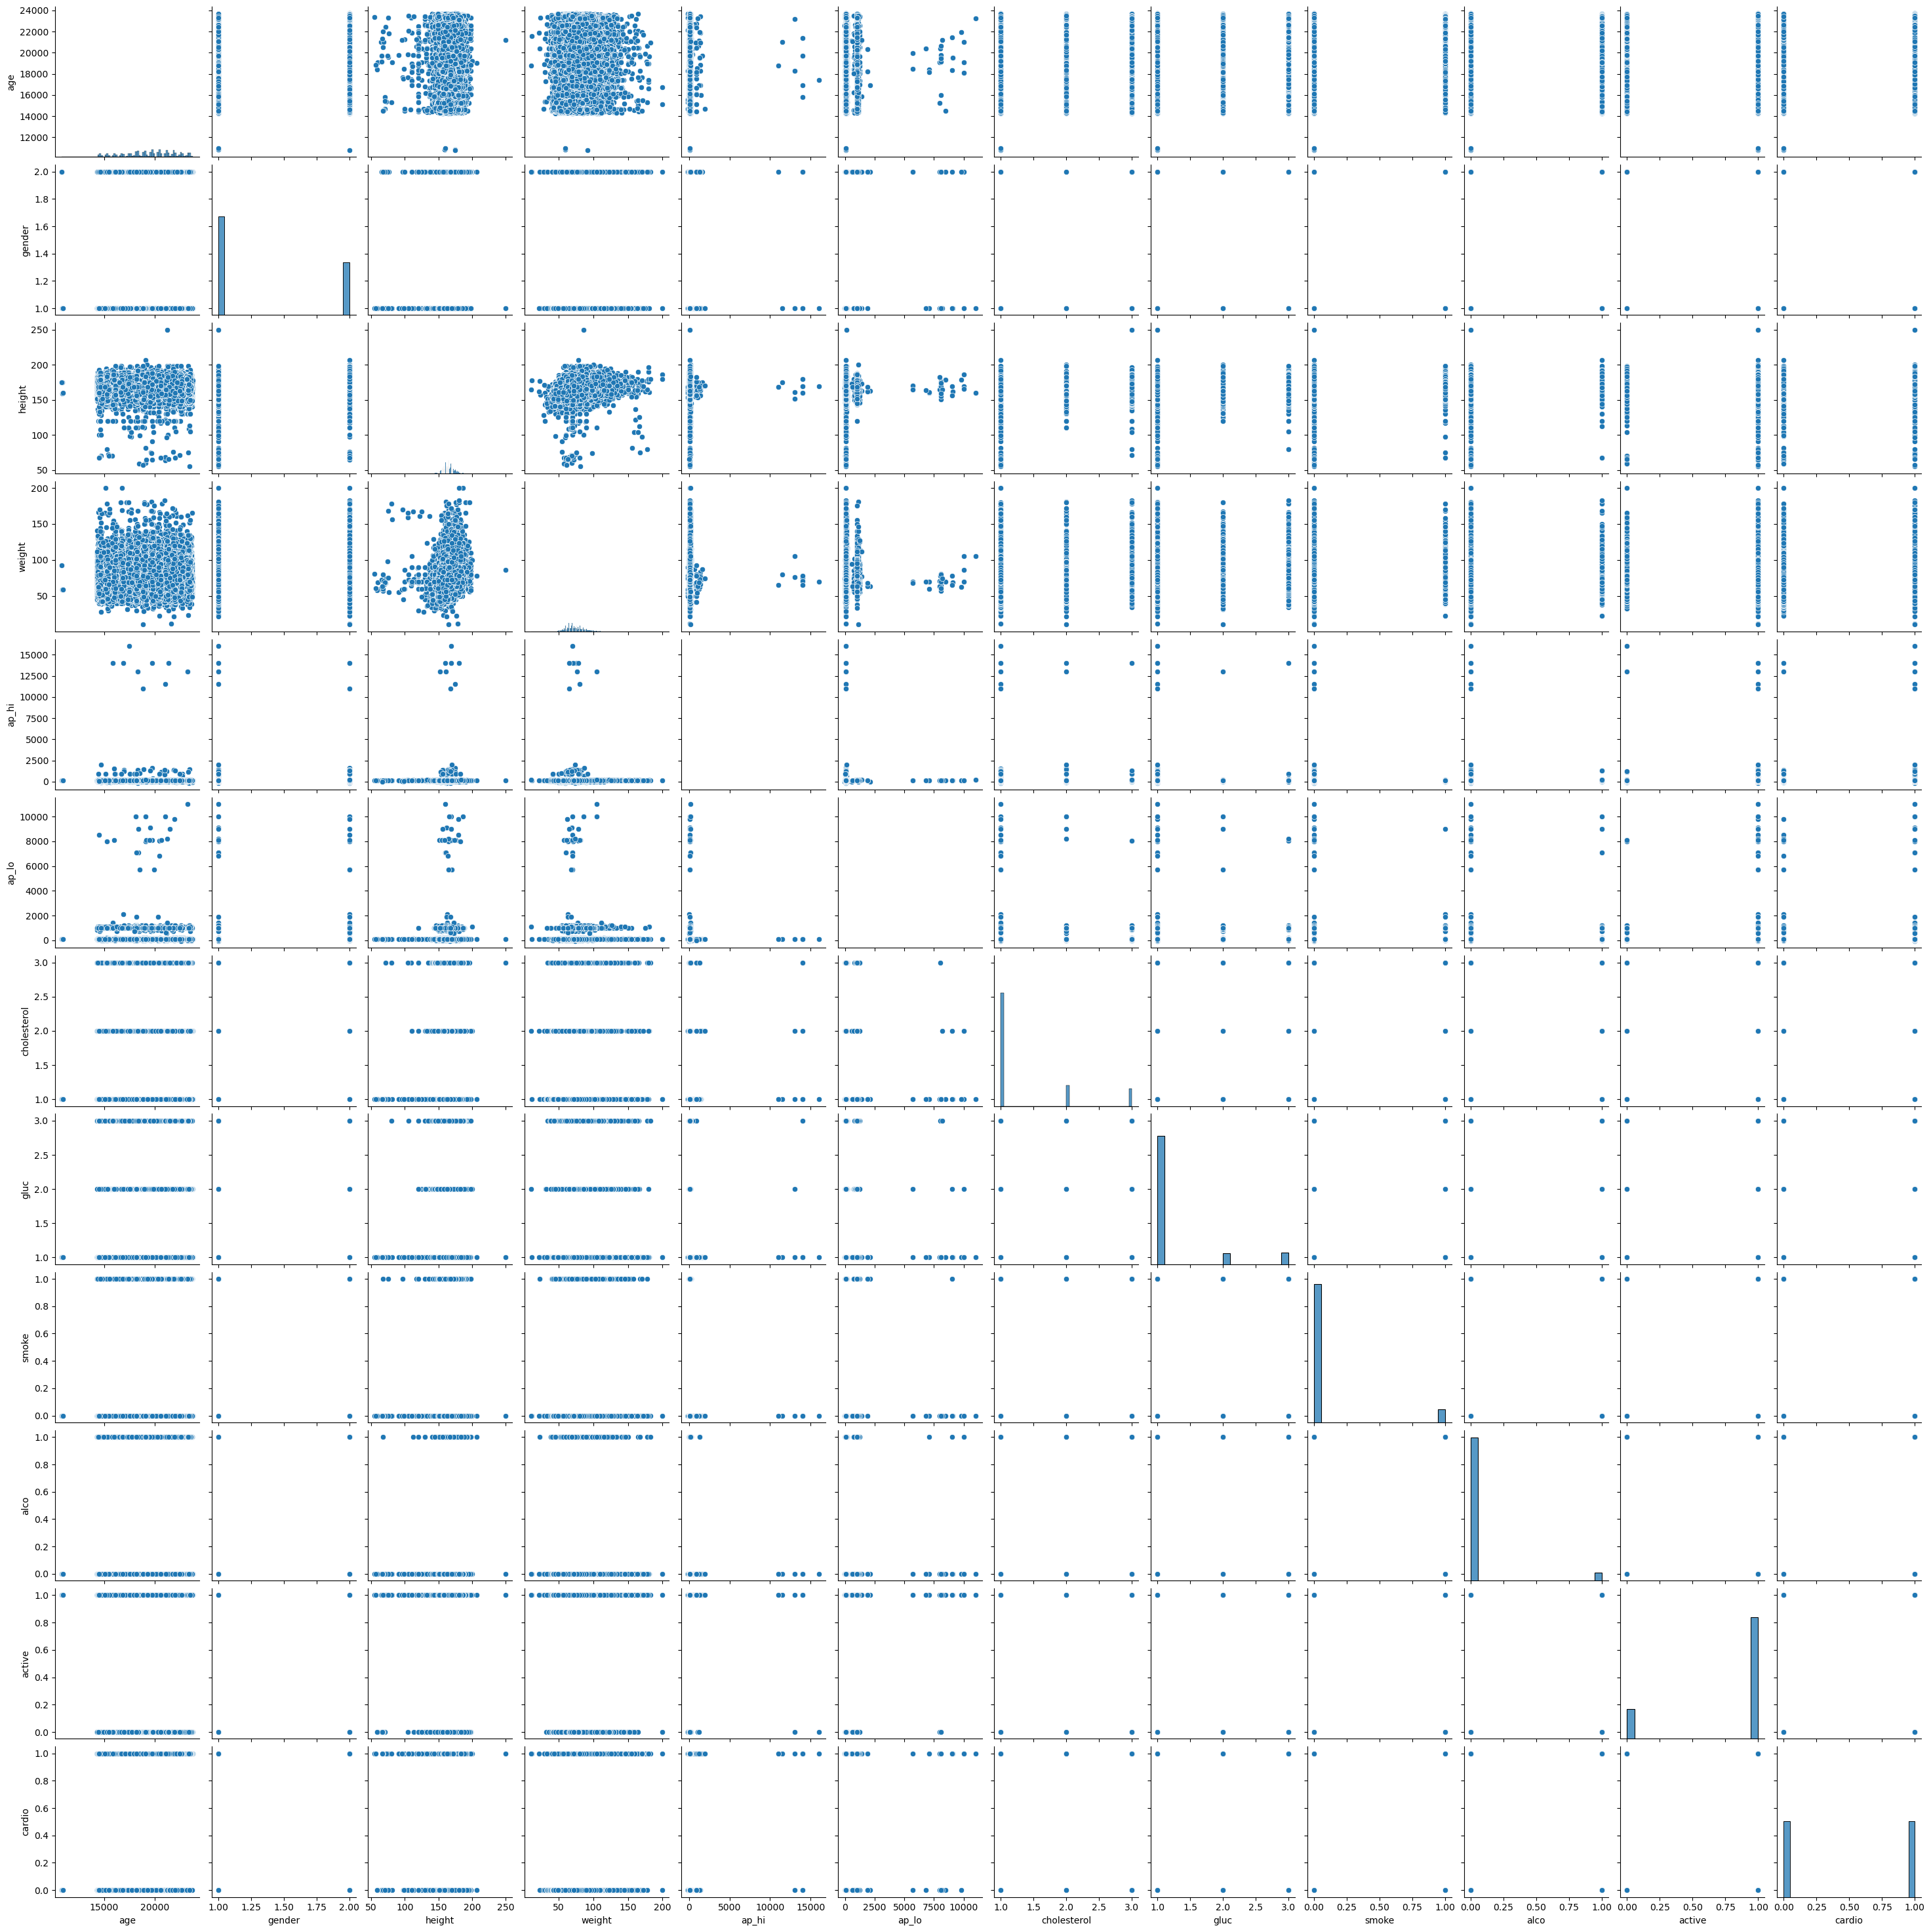

In [182]:
#used to create a pair plot & histograms for each variable along the diagonal
#each pair of numerical variables will show 
sns.pairplot(df)

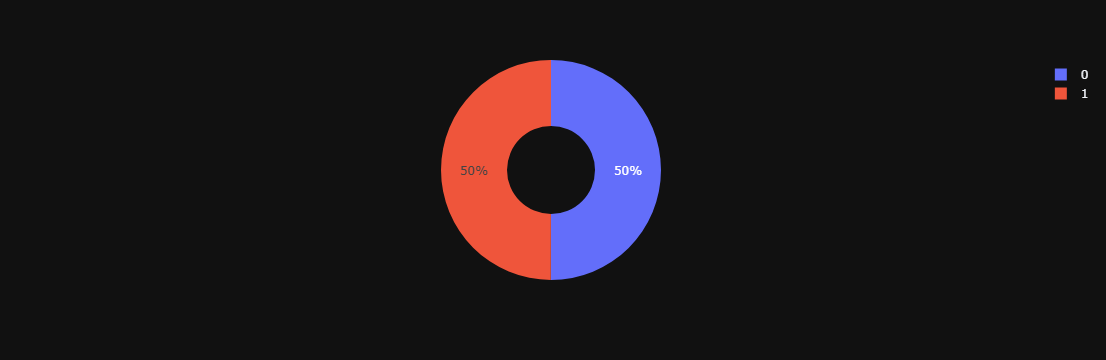

In [183]:
#generates a pie chart from the "cardio" column of your DataFrame 
fig = px.pie(df,names="cardio",hole = 0.4,template = "plotly_dark")
fig.show()

<Axes: >

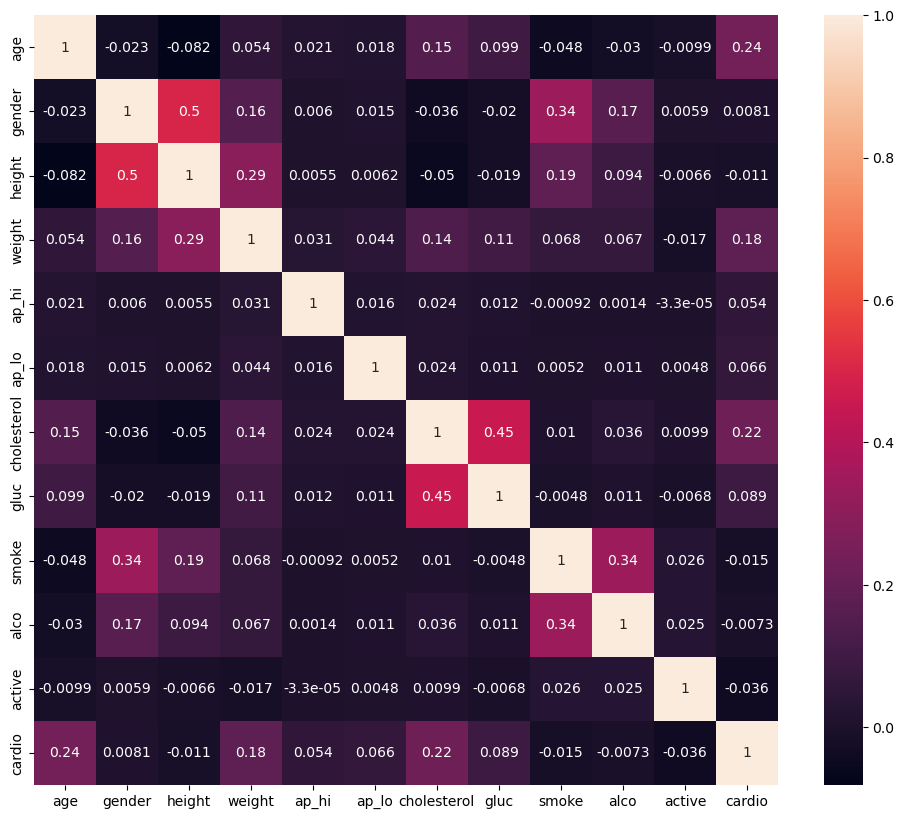

In [189]:
# Creates a Matplotlib figure with a specified size of 12 inches in width and 10 inches in height
plt.figure(figsize=(12,10))

#create a heatmap & parameter adds numerical annotations to the heatmap  
sns.heatmap(df.corr(),annot=True)#Which features has highest corrilation to the target
# 1 means it is perfectly correlated or correlated with itself

In [191]:
model = LogisticRegression()

In [193]:
#Training 
model.fit(x_train,y_train)

LogisticRegression()

In [195]:
#Predict
pred = model.predict(x_test)

#accuracy score
accuracy_score_lg = accuracy_score(y_test,pred)
accuracy_score_lg*100

71.55238095238096

In [197]:
#model_dt = DecisionTreeClassifier(max_depth = 8  ,random_state = 100 )
#train
# Assuming x and y are your feature matrix and target variable 
# Represent the Decision Tree model with specified hyperparameters
model_dt = DecisionTreeClassifier(criterion = "entropy", splitter = "best", max_depth = 8,  min_samples_split = 6,
                              min_samples_leaf = 4, max_features = 9)

# Train the Decision Tree model
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=9,
                       min_samples_leaf=4, min_samples_split=6)

In [199]:
#Predictions on the test set
pred_dt = model_dt.predict(x_test)
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt*100
     

72.73333333333333

[Text(0.5451916436464088, 0.9444444444444444, 'x[4] <= 0.004\nentropy = 1.0\nsamples = 49000\nvalue = [24450, 24550]'),
 Text(0.2921270718232044, 0.8333333333333334, 'x[0] <= 0.152\nentropy = 0.903\nsamples = 28960\nvalue = [19717, 9243]'),
 Text(0.15400552486187846, 0.7222222222222222, 'x[6] <= 1.666\nentropy = 0.789\nsamples = 17371\nvalue = [13261, 4110]'),
 Text(0.081146408839779, 0.6111111111111112, 'x[0] <= -1.366\nentropy = 0.763\nsamples = 16647\nvalue = [12959, 3688]'),
 Text(0.04074585635359116, 0.5, 'x[6] <= 0.196\nentropy = 0.573\nsamples = 4738\nvalue = [4094.0, 644.0]'),
 Text(0.022099447513812154, 0.3888888888888889, 'x[4] <= -0.093\nentropy = 0.531\nsamples = 4282\nvalue = [3766, 516]'),
 Text(0.011049723756906077, 0.2777777777777778, 'x[7] <= 0.478\nentropy = 0.411\nsamples = 1806\nvalue = [1657, 149]'),
 Text(0.0055248618784530384, 0.16666666666666666, 'x[3] <= -1.577\nentropy = 0.38\nsamples = 1708\nvalue = [1582, 126]'),
 Text(0.0027624309392265192, 0.05555555555555

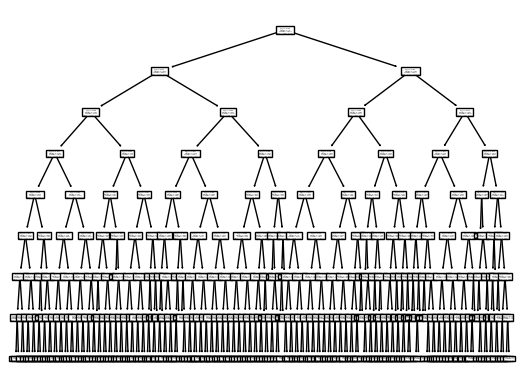

In [201]:
from sklearn import tree
tree.plot_tree(model_dt)

In [203]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Represent the RandomForestClassifier with specified hyperparameters
model_rf = RandomForestClassifier(max_depth = 14 , random_state = 12,n_estimators=30)

# Train the RandomForest model
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=14, n_estimators=30, random_state=12)

In [206]:
#predictions on the test set
pred_rf = model_rf.predict(x_test)
accuracy_score_rf = accuracy_score(y_test , pred_rf)
accuracy_score_rf*100
     

73.61428571428571

In [208]:
#confussion matrix
cm3 = confusion_matrix(y_test,pred_rf)
cm3
# 367 correct classifed as 0 and 35 is wrong classifed as 0
# 169 correct classifed as 1 and 85 is wrong classifed as 1

array([[5489, 1526],
       [2168, 4817]], dtype=int64)

In [210]:
#create object
model_knn = KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

#check for which neighbor u get better accuracy
for i in range(3,25):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(i,accuracy_score_knn)

3 0.6385714285714286
4 0.6315714285714286
5 0.6504285714285715
6 0.6436666666666667
7 0.6511904761904762
8 0.6456190476190476
9 0.6572380952380953
10 0.6500952380952381
11 0.6576190476190477
12 0.6533333333333333
13 0.6605238095238095
14 0.6563333333333333
15 0.663952380952381
16 0.6575714285714286
17 0.6632380952380953
18 0.6597619047619048
19 0.6644761904761904
20 0.6592380952380953
21 0.6662380952380952
22 0.6608095238095238
23 0.6647142857142857
24 0.6609047619047619


In [211]:
#Represent the KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test,pred_knn)
print(accuracy_score_knn)

0.6436666666666667


In [214]:
#Represent the KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test,pred_knn)
print(accuracy_score_knn)

0.6436666666666667


In [216]:
# Assuming x and y are your feature matrix and target variable Which we have done befor
from sklearn.svm import SVC

# Represent the SVM model with an RBF kernel
model_svm = SVC(kernel='rbf',C=1,gamma ='auto')

# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 23 ,shuffle = True)

# Train the SVM model
model_svm.fit(x_train,y_train)

SVC(C=1, gamma='auto')

In [218]:
#predictions on the test set
pred_svm = model_svm.predict(x_test)
accuracy_score_svm = accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

72.69285714285715

In [220]:
models = pd.DataFrame({
    "model" : ["Logistic Regression",
               "Decision Tree",
               "Random Forest",
               "KNN",
               "SVM",
               ],
    "Accuracy Score" : [accuracy_score_lg ,accuracy_score_dt ,
                          accuracy_score_rf ,accuracy_score_knn ,
                          accuracy_score_svm ]

})

In [222]:
models 

,model,Accuracy Score
0,Logistic Regression,0.715524
1,Decision Tree,0.727333
2,Random Forest,0.736143
3,KNN,0.643667
4,SVM,0.726929


,model,Accuracy Score
2,Random Forest,0.736143
1,Decision Tree,0.727333
4,SVM,0.726929
0,Logistic Regression,0.715524
3,KNN,0.643667


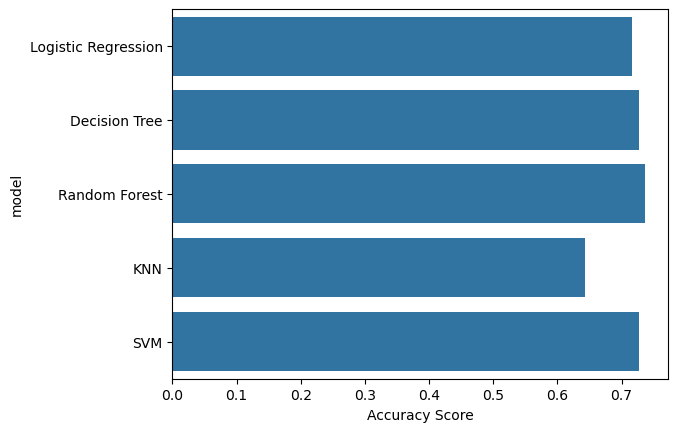

In [224]:
sns.barplot(x="Accuracy Score", y= "model",data = models)
models.sort_values(by = "Accuracy Score",ascending = False)

In [226]:
#;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
#example to enter below
#14532;2;181;95.0;130;90;1;1;1;1;0;0
v1=int(input("Enter age vlaue  :"))
v1

Enter age vlaue  : 17343


17343

In [228]:
v2=int(input("Enter gender vlaue :"))
v2

Enter gender vlaue : 2


2

In [230]:
v3=float(input("Enter height vlaue  :"))
v3

Enter height vlaue  : 168


168.0

In [232]:
v4=float(input("Enter weight vlaue  :"))
v4
    

Enter weight vlaue  : 62


62.0

In [234]:
v5=float(input("Enter ap_hi vlaue  :"))
v5

Enter ap_hi vlaue  : 110


110.0

In [236]:
v6=float(input("Enter ap_lo vlaue  :"))
v6

Enter ap_lo vlaue  : 80


80.0

In [238]:
v7=int(input("Enter cholesterol vlaue :"))
v7

Enter cholesterol vlaue : 1


1

In [240]:
v8=int(input("Enter gluc vlaue :"))
v8

Enter gluc vlaue : 1


1

In [242]:
v9=int(input("Enter smoke vlaue :"))
v9

Enter smoke vlaue : 0


0

In [244]:
v10=int(input("Enter alco vlaue :"))
v10

Enter alco vlaue : 1


1

In [250]:
v11=int(input("Enter active vlaue :"))
v11
   

Enter active vlaue : 1


1

In [252]:
X_new = [[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11]]
y_pred = model_rf.predict(X_new)
print (y_pred)
if (y_pred==1):
  print ("Have Cardio")
else:
  print(" not Cardio")

[1]
Have Cardio


In [254]:
v11=int(input("Enter age vlaue  :"))
v11

Enter age vlaue  : 18857


18857

In [256]:
v12=int(input("Enter gender vlaue :"))
v12

Enter gender vlaue : 1


1

In [258]:
v13=float(input("Enter height vlaue  :"))
v13

Enter height vlaue  : 165


165.0

In [260]:
v14=float(input("Enter weight vlaue  :"))
v14

Enter weight vlaue  : 65


65.0

In [262]:
v15=float(input("Enter ap_hi vlaue  :"))
v15

Enter ap_hi vlaue  : 130


130.0

In [264]:
v16=float(input("Enter ap_lo vlaue  :"))
v16

Enter ap_lo vlaue  : 70


70.0

In [266]:
v17=int(input("Enter cholesterol vlaue :"))
v17

Enter cholesterol vlaue : 3


3

In [268]:
v18=int(input("Enter gluc vlaue :"))
v18

Enter gluc vlaue : 1


1

In [270]:
v19=int(input("Enter smoke vlaue :"))
v19

Enter smoke vlaue : 1


1

In [272]:
v20=int(input("Enter alco vlaue :"))
v20

Enter alco vlaue : 0


0

In [278]:
v21=int(input("Enter active vlaue :"))
v21
    

Enter active vlaue : 0


0

In [280]:
X_new = [[v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21]]
y_pred = model_rf.predict(X_new)
print (y_pred)
if (y_pred==1):
  print ("Have Cardio")
else:
  print("Does not have Cardio")

[1]
Have Cardio
